# differential-expression-barplots
8.12.24

Making some barplots for comparing the number of DE proteins after imputation with each method. 
Including DreamAI here. Also, cleaning up this workflow. 

EXCLUDING BRCA and GBM due to sample quality issues (this was done by the authors of the CPTAC study). 

In [9]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# plotting templates
sns.set(context="talk", style="ticks") 
pal = sns.color_palette("tab10")

#### Configs

In [10]:
cust_palette = ["#ff7f0e", "#1f77b4", "#2ca02c", "#9467bd"]

#### Construct the plotting dataframe

In [11]:
cols = ["cohort", "Lupine_up", "Lupine_down", "No Impute_up", "No Impute_down",
       "Gaussian Random Sampling_up", "Gaussian Random Sampling_down", 
        "DreamAI_up", "DreamAI_down"
       ]
plotter = pd.DataFrame(columns=cols)

plotter["cohort"] = ["CCRCC", "COAD", "HGSC", "HNSCC", "LSCC", "LUAD", "PDAC", "UCEC"]

plotter["Lupine_up"] = [102, 15, 5, 36, 74, 10, 47, 33]
plotter["Lupine_down"] =[462, 256, 269, 176, 306, 110, 126, 344]

plotter["No Impute_up"] = [71, 9, 1, 23, 60, 9, 22, 15]
plotter["No Impute_down"] = [308, 183, 76, 107, 230, 78, 83, 211]

plotter["Gaussian Random Sampling_up"] = [56, 7, 2, 18, 47, 6, 22, 8]
plotter["Gaussian Random Sampling_down"] = [296, 186, 75, 107, 206, 70, 68, 217]

plotter["DreamAI_up"] = [96, 13, 4, 28, 75, 9, 36, 29]
plotter["DreamAI_down"] = [425, 244, 292, 169, 307, 109, 123, 334]

#### Do a little data wranglin'
Yeehaw. 

In [12]:
# Break out into separate up- and down-reg dataframes
up_reg_plotter = plotter[["cohort", "Lupine_up", "No Impute_up", 
                          "Gaussian Random Sampling_up", "DreamAI_up"]]
down_reg_plotter = plotter[["cohort", "Lupine_down", "No Impute_down", 
                            "Gaussian Random Sampling_down", "DreamAI_down"]]

# Melt the up-regulated dataframe
up_reg_melt = up_reg_plotter.melt("cohort")
up_reg_melt.columns = ["cohort", "method", "proteins"]

methods = [x.split("_")[0] for x in up_reg_melt.method]

up_reg_melt["method"] = methods

# Repeat for the down-regulated dataframe
down_reg_melt = down_reg_plotter.melt("cohort")
down_reg_melt.columns = ["cohort", "method", "proteins"]

methods1 = [x.split("_")[0] for x in down_reg_melt.method]

down_reg_melt["method"] = methods1

#### Sort by number of proteins
I think this will make the barplots more visually interpretable. 

In [13]:
up_reg_melt = up_reg_melt.sort_values("proteins", ascending=False)
down_reg_melt = down_reg_melt.sort_values("proteins", ascending=False)

#### Side-by-side bar plots, base case

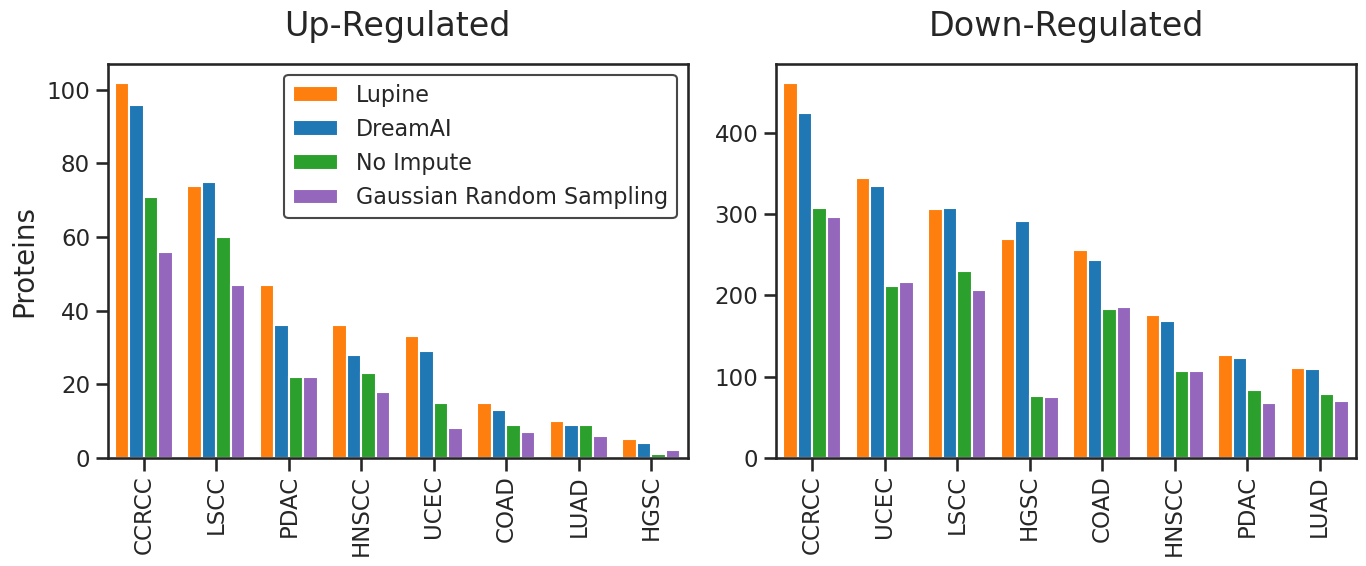

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# The up-regulated results
sns.barplot(
    data=up_reg_melt, 
    x="cohort", 
    y="proteins", 
    hue="method", 
    palette=cust_palette, 
    saturation=1, 
    ax=ax1
)
ax1.set_title("Up-Regulated", pad=20, size=24)
ax1.set_xlabel("")
ax1.set_ylabel("Proteins", labelpad=6, size=20)
ax1.tick_params(axis='x', labelrotation=90)
#ax1.set_ylim(top=850)
ax1.legend(title="", edgecolor="k", prop={'size': 16})

# The down-regulated results
sns.barplot(
    data=down_reg_melt, 
    x="cohort", 
    y="proteins", 
    hue="method", 
    palette=cust_palette, 
    saturation=1, 
    ax=ax2
)
ax2.set_title("Down-Regulated", pad=20, size=24)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.tick_params(axis='x', labelrotation=90)
#ax2.set_ylim(top=1000)
ax2.get_legend().remove()

plt.tight_layout()
#plt.show()
plt.savefig("../figures/DE-barplots-wDream.pdf", bbox_inches="tight")
#plt.savefig("figures/DE-barplots-figure.png", dpi=250, bbox_inches="tight")

#### Can we try to get broken y axes for this plot? 
To show the full range of the BRCA proteins? Try it for just a single plot at a time. 

In [15]:
# fig, (ax1, ax2) = plt.subplots(
#                         nrows=2, ncols=1, 
#                         figsize=(6.5, 6),
#                         gridspec_kw={'height_ratios': [1, 3]}
# )
# # THE UP-REGULATED RESULTS
# sns.barplot(
#     data=up_reg_melt, 
#     x="cohort", 
#     y="proteins", 
#     hue="method", 
#     palette=cust_palette, 
#     saturation=1,
#     width=0.7, 
#     ax=ax1,
# )
# sns.barplot(
#     data=up_reg_melt, 
#     x="cohort", 
#     y="proteins", 
#     hue="method", 
#     palette=cust_palette, 
#     saturation=1, 
#     width=0.7, 
#     ax=ax2,
# )
# # THE OUTLIERS
# ax1.set_ylim(900, 1000) # outliers only
# ax1.spines["bottom"].set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False, top=False)

# ax1.set_title("Up-Regulated", pad=20, size=20)
# ax1.set_xlabel("")
# ax1.set_ylabel("")
# ax1.legend(title="", edgecolor="k", prop={'size': 16})

# # MOST OF THE DATA
# ax2.set_ylim(0, 300) # most of the data

# ax2.set_xlabel("")
# ax2.set_ylabel("Proteins", loc="top", labelpad=12, size=20)
# ax2.tick_params(axis='x', labelrotation=90)
# ax2.get_legend().remove()

# ax2.spines["top"].set_visible(False)
# ax2.xaxis.tick_bottom()

# # Plot the hashmarks
# d = .010  # hashmark size

# # Top axes
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left hash
# ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right hash

# # Bottom axes
# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left hash
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) # bottom-right hash

# plt.tight_layout()
# plt.show()
# #plt.savefig("../figures/DE-barplots-upreg-wDream.pdf", bbox_inches="tight")

#### Down-regulated only

In [16]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 6))

# # THE DOWN-REGULATED RESULTS
# sns.barplot(
#     data=down_reg_melt, 
#     x="cohort", 
#     y="proteins", 
#     hue="method", 
#     palette=cust_palette, 
#     saturation=1, 
#     width=0.7, 
#     ax=ax,
# )
# ax.set_title("Down-Regulated", pad=20, size=20)
# ax.set_ylabel("", labelpad=12, size=20)
# ax.set_xlabel("")
# ax.legend(title="", edgecolor="k", prop={'size': 16})
# ax.tick_params(axis='x', labelrotation=90)

# plt.tight_layout()
# plt.show()
# #plt.savefig("../figures/DE-barplots-downreg-wDream.pdf", bbox_inches="tight")